## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

### Load the dataset

In [2]:
tips_data = sns.load_dataset('tips')

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
tips_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# List of Categorical Columns
tips_data.select_dtypes (include= ['category']).columns.tolist ()

['sex', 'smoker', 'day', 'time']

In [5]:
# List of Numerical Columns
tips_data.select_dtypes (include= ['int','float']).columns.tolist ()

['total_bill', 'tip', 'size']

### 2. Compute the average bill amount for each day.

day
Thur    17.68
Fri     17.15
Sat     20.44
Sun     21.41
Name: total_bill, dtype: float64


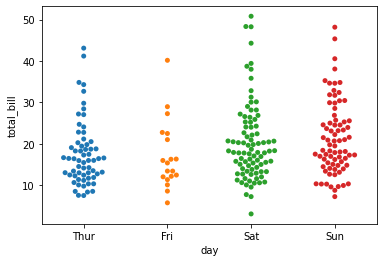

In [6]:
avg_bill = tips_data.groupby('day')['total_bill'].mean().round(2)
print(avg_bill)
avg = sns.swarmplot(x="day", y="total_bill", data=tips_data)


According to above data analysis we found that average bill amount on thrusday and friday is almost same and we have more number of customers eating out on Sundays.

### 3. Which gender is more generous in giving tips?

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

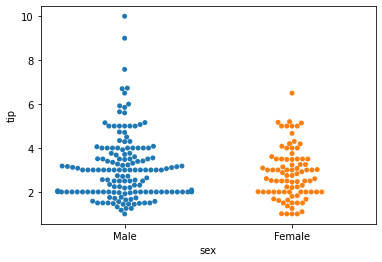

In [7]:
sns.swarmplot(x="sex", y="tip", data=tips_data)
tips_data.groupby('sex')['tip'].sum().round(2)

According to above data analysis we found that males are more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
tips_data.groupby('time')['size'].sum() # Total Number of Customers

time
Lunch     164
Dinner    463
Name: size, dtype: int64

In [9]:
tips_data.groupby('time')['size'].count() # Total Number of Transactions

time
Lunch      68
Dinner    176
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
tips_data.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [11]:
#tips_data.groupby('day')['day'].count()
tips_data['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Saturday is the busiest day in terms of orders as there were 87 orders places on saturday.

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

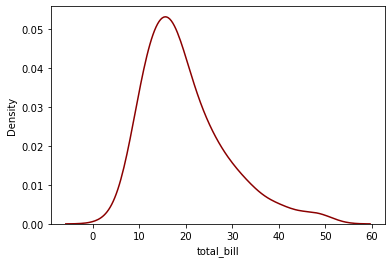

In [12]:
tb = sns.distplot(tips_data['total_bill'],
             hist=False, color='darkred',
            )

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

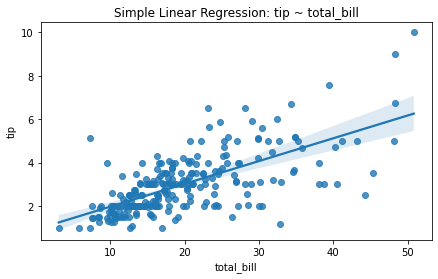

In [13]:
plt.figure(figsize=(7, 4)) 
sns.regplot(x="total_bill", y="tip", data=tips_data) 
plt.title("Simple Linear Regression: tip ~ total_bill")

plt.show()

The Above plot shows that there does appear to be a positive linear relationship of sorts between the two variables total bill and tip amount with the points forming a line across the diagonal from the intersection of the axis up to the top right hand corner. The plot shows a few higher tips for smaller total bills but there are quite a number of observations where the tip seems quite small in comparison to the total bill size.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

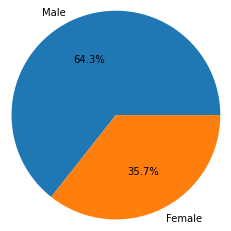

In [14]:
plt.pie(tips_data.sex.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['Male','Female'])

plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

smoker  Yes  No
sex            
Male     60  97
Female   33  54


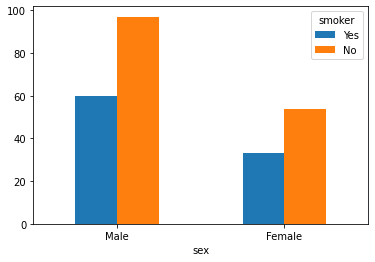

In [15]:
crosstb = pd.crosstab(tips_data['sex'],tips_data['smoker'])
print(crosstb)

barplot = crosstb.plot.bar(rot=0)
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

day
Thur    2.77
Fri     2.73
Sat     2.99
Sun     3.26
Name: tip, dtype: float64


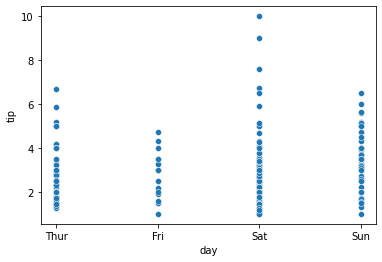

In [16]:
##To understan the tip amount given for different days
avg_tip = tips_data.groupby('day')['tip'].mean()
print(avg_tip.round(2))
sns.scatterplot(x="day", y='tip', data=tips_data)

plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

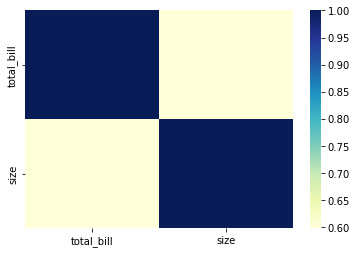

In [17]:
bill_size_corr=tips_data[['total_bill','size']]
bill_size_corr.corr()
sns.heatmap(bill_size_corr.corr(),cmap="YlGnBu")

plt.show()

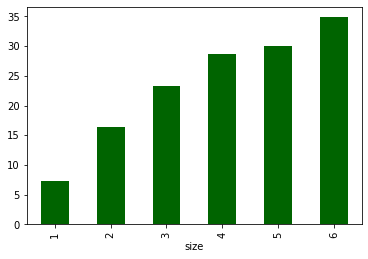

In [18]:
tips_data.groupby(['size'])['total_bill'].mean().plot.bar(color="darkgreen")
plt.show()

Above plots depcits that the average bill amount depends upon the size of the group

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

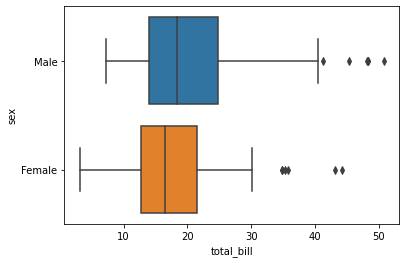

In [19]:
sns.boxplot(x='total_bill',y='sex',data=tips_data)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [20]:
max_bill_amt = tips_data.groupby(['day','time'],as_index=False)['total_bill'].max()
max_bill_amt[(max_bill_amt['day'] == 'Sat') | (max_bill_amt['day'] == 'Sun')]

,day,time,total_bill
4,Sat,Lunch,NaN
5,Sat,Dinner,50.81
6,Sun,Lunch,NaN
7,Sun,Dinner,48.17


### 15. Compute the percentage of missing values in the dataset.

In [21]:
tips_data.isnull().sum() / tips_data.shape[0] * 100.00

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [22]:
# Befor Removinf the Duplicate Record
len(tips_data[tips_data.duplicated()])

1

In [23]:
# Removing Duplicates
tips_data.drop_duplicates(keep='first',inplace=True)

In [24]:
# After Removin the Duplicate Record
len(tips_data[tips_data.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

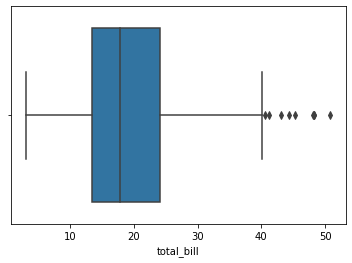

In [25]:
# Before Transformation
sns.boxplot(tips_data['total_bill'])
plt.show()

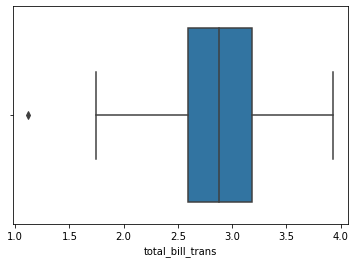

In [26]:
# After Transformation
tips_data['total_bill_trans'] = np.log(tips_data['total_bill'])

sns.boxplot(tips_data['total_bill_trans'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

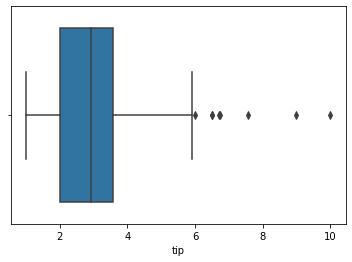

In [27]:
#Before using IQR technique
sns.boxplot(tips_data['tip'])
plt.show()

In [28]:
#IQR technique
Q1 = tips_data['tip'].quantile(0.25)
Q3 = tips_data['tip'].quantile(0.75)
IQR = Q3-Q1
lower_whisker = Q1 - (1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)

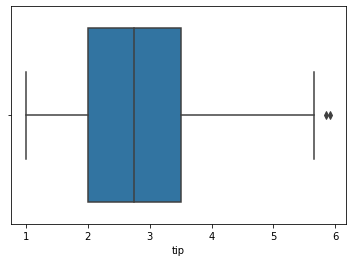

In [29]:
df_out = tips_data.loc[(tips_data['tip'] < upper_whisker) & (tips_data['tip'] > lower_whisker)] # rows without outliers

sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [30]:
# Encode using get dummies
df = pd.get_dummies(tips_data,drop_first =True)

df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
75,10.51,1.25,2,2.352327,0,1,0,1,0,1
209,12.76,2.23,2,2.546315,1,0,0,1,0,1
3,23.68,3.31,2,3.164631,0,1,0,0,1,1
150,14.07,2.50,2,2.644045,0,1,0,0,1,1
194,16.58,4.00,2,2.808197,0,0,0,0,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [31]:
# We will be trying Min-Max scalar for normalization process
max_bill = tips_data['total_bill'].max()
min_bill = tips_data['total_bill'].min()

bill_range = max_bill - min_bill
print('Before Normalization: ',bill_range)

#initialize minmaxscalar
mm = MinMaxScaler()

# Normalizing  the values of the total_bill, so that the range will be 1

tips_data['total_bill_mm'] = mm.fit_transform(tips_data[['total_bill']])

# checking the range after normalization

max_bill_mm = tips_data['total_bill_mm'].max()
min_bill_mm = tips_data['total_bill_mm'].min()

bill_range_mm = max_bill_mm - min_bill_mm
print('After Normalization: ',bill_range_mm)

Before Normalization:  47.74
After Normalization:  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [32]:
tips_df = tips_data.copy()

In [33]:
# i) Encoding the categorical variables
tips_df = pd.get_dummies(tips_data,drop_first = True)
tips_df.sample(5)

,total_bill,tip,size,total_bill_trans,total_bill_mm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
212,48.33,9.00,4,3.878052,0.948052,0,1,0,1,0,1
34,17.78,3.27,2,2.878074,0.308127,0,1,0,1,0,1
90,28.97,3.00,2,3.366261,0.542522,0,0,1,0,0,1
131,20.27,2.83,2,3.009142,0.360285,1,1,0,0,0,0
98,21.01,3.00,2,3.044999,0.375786,0,0,1,0,0,1


In [34]:
# ii)
X=tips_df[['total_bill','size','total_bill_trans','total_bill_mm','sex_Female','smoker_No','day_Fri','day_Sat','day_Sun','time_Dinner']]
print(X)

y=tips_df['tip']
print(y)

     total_bill  size  total_bill_trans  total_bill_mm  sex_Female  smoker_No  \
0         16.99     2          2.832625       0.291579           1          1   
1         10.34     3          2.336020       0.152283           0          1   
2         21.01     3          3.044999       0.375786           0          1   
3         23.68     2          3.164631       0.431713           0          1   
4         24.59     4          3.202340       0.450775           1          1   
..          ...   ...               ...            ...         ...        ...   
239       29.03     3          3.368330       0.543779           0          1   
240       27.18     2          3.302481       0.505027           1          0   
241       22.67     2          3.121042       0.410557           0          0   
242       17.82     2          2.880321       0.308965           0          1   
243       18.78     2          2.932792       0.329074           1          1   

     day_Fri  day_Sat  day_

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# create an  object
min_max = MinMaxScaler()

df_mm = tips_df.copy()

df_mm.iloc[:,[0,2]] = min_max.fit_transform(df_mm.iloc[:,[0,2]])
df_mm.head()

,total_bill,tip,size,total_bill_trans,total_bill_mm,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,0.291579,1.01,0.2,2.832625,0.291579,1,1,0,0,1,1
1,0.152283,1.66,0.4,2.336020,0.152283,0,1,0,0,1,1
2,0.375786,3.50,0.4,3.044999,0.375786,0,1,0,0,1,1
3,0.431713,3.31,0.2,3.164631,0.431713,0,1,0,0,1,1
4,0.450775,3.61,0.6,3.202340,0.450775,1,1,0,0,1,1


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
regression_model.intercept_

-0.7282533960145159

In [38]:
coeff = pd.DataFrame(regression_model.coef_,X.columns,columns=['object'])
coeff

,object
total_bill,0.072143
size,0.065113
total_bill_trans,0.721986
total_bill_mm,0.001511
sex_Female,0.109531
smoker_No,0.054334
day_Fri,0.271746
day_Sat,0.261572
day_Sun,0.287788
time_Dinner,-0.320529


In [39]:
prediction = regression_model.predict(X_test)
from sklearn.metrics import r2_score
print('R Squared Score is:', r2_score(y_test, prediction))

R Squared Score is: 0.3685758061588311


### Happy Learning:)